In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch


In [2]:
#accessing the dataset
df = pd.read_csv("players_20.csv")

In [3]:
df

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2         190871  https://sofifa.com/player/190871/neymar-da-sil...   
3         200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4         183277  https://sofifa.com/player/183277/eden-hazard/2...   
...          ...                                                ...   
18273     245006  https://sofifa.com/player/245006/shuai-shao/20...   
18274     250995  https://sofifa.com/player/250995/mingjie-xiao/...   
18275     252332  https://sofifa.com/player/252332/wei-zhang/20/...   
18276     251110  https://sofifa.com/player/251110/haijian-wang/...   
18277     233449  https://sofifa.com/player/233449/ximing-pan/20...   

              short_name                            long_name  age  \
0               L. Messi       Lionel Andrés Messi Cuccittini   32   
1      Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34   
2              Neymar Jr        Neymar da Silva Santos Junior   27   
3               J. Oblak                            Jan Oblak   26   
4              E. Hazard                          Eden Hazard   28   
...                  ...                                  ...  ...   
18273         Shao Shuai                                   邵帅   22   
18274       Xiao Mingjie                         Mingjie Xiao   22   
18275          Zhang Wei                                   张威   19   
18276       Wang Haijian                                  汪海健   18   
18277         Pan Ximing                                  潘喜明   26   

              dob  height_cm  weight_kg nationality  \
0      1987-06-24        170         72   Argentina   
1      1985-02-05        187         83    Portugal   
2      1992-02-05        175         68      Brazil   
3      1993-01-07        188         87    Slovenia   
4      1991-01-07        175         74     Belgium   
...           ...        ...        ...         ...   
18273  1997-03-10        186         79    China PR   
18274  1997-01-01        177         66    China PR   
18275  2000-05-16        186         75    China PR   
18276  2000-08-02        185         74    China PR   
18277  1993-01-11        182         78    China PR   

                                club  ...   lwb   ldm   cdm   rdm   rwb    lb  \
0                       FC Barcelona  ...  68+2  66+2  66+2  66+2  68+2  63+2   
1                           Juventus  ...  65+3  61+3  61+3  61+3  65+3  61+3   
2                Paris Saint-Germain  ...  66+3  61+3  61+3  61+3  66+3  61+3   
3                    Atlético Madrid  ...   NaN   NaN   NaN   NaN   NaN   NaN   
4                        Real Madrid  ...  66+3  63+3  63+3  63+3  66+3  61+3   
...                              ...  ...   ...   ...   ...   ...   ...   ...   
18273               Beijing Renhe FC  ...  43+2  42+2  42+2  42+2  43+2  45+2   
18274               Shanghai SIPG FC  ...  44+2  43+2  43+2  43+2  44+2  46+2   
18275         Hebei China Fortune FC  ...  47+2  49+2  49+2  49+2  47+2  47+2   
18276  Shanghai Greenland Shenhua FC  ...  48+2  48+2  48+2  48+2  48+2  48+2   
18277         Hebei China Fortune FC  ...  48+2  49+2  49+2  49+2  48+2  48+2   

        lcb    cb   rcb    rb  
0      52+2  52+2  52+2  63+2  
1      53+3  53+3  53+3  61+3  
2      46+3  46+3  46+3  61+3  
3       NaN   NaN   NaN   NaN  
4      49+3  49+3  49+3  61+3  
...     ...   ...   ...   ...  
18273  46+2  46+2  46+2  45+2  
18274  47+2  47+2  47+2  46+2  
18275  49+2  49+2  49+2  47+2  
18276  49+2  49+2  49+2  48+2  
18277  50+2  50+2  50+2  48+2  

[18278 rows x 104 columns]

In [4]:
df.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  ...   lwb   ldm  \
0        170         72   Argentina         FC Barcelona  ...  68+2  66+2   
1        187         83    Portugal             Juventus  ...  65+3  61+3   
2        175         68      Brazil  Paris Saint-Germain  ...  66+3  61+3   
3        188         87    Slovenia      Atlético Madrid  ...   NaN   NaN   
4        175         74     Belgium          Real Madrid  ...  66+3  63+3   

    cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
0  66+2  66+2  68+2  63+2  52+2  52+2  52+2  63+2  
1  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3  
2  61+3  61+3  66+3  61+3  46+3  46+3  46+3  61+3  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  63+3  63+3  66+3  61+3  49+3  49+3  49+3  61+3  

[5 rows x 104 columns]

In [5]:
df.tail()

sofifa_id                                         player_url  \
18273     245006  https://sofifa.com/player/245006/shuai-shao/20...   
18274     250995  https://sofifa.com/player/250995/mingjie-xiao/...   
18275     252332  https://sofifa.com/player/252332/wei-zhang/20/...   
18276     251110  https://sofifa.com/player/251110/haijian-wang/...   
18277     233449  https://sofifa.com/player/233449/ximing-pan/20...   

         short_name     long_name  age         dob  height_cm  weight_kg  \
18273    Shao Shuai            邵帅   22  1997-03-10        186         79   
18274  Xiao Mingjie  Mingjie Xiao   22  1997-01-01        177         66   
18275     Zhang Wei            张威   19  2000-05-16        186         75   
18276  Wang Haijian           汪海健   18  2000-08-02        185         74   
18277    Pan Ximing           潘喜明   26  1993-01-11        182         78   

      nationality                           club  ...   lwb   ldm   cdm   rdm  \
18273    China PR               Beijing Renhe FC  ...  43+2  42+2  42+2  42+2   
18274    China PR               Shanghai SIPG FC  ...  44+2  43+2  43+2  43+2   
18275    China PR         Hebei China Fortune FC  ...  47+2  49+2  49+2  49+2   
18276    China PR  Shanghai Greenland Shenhua FC  ...  48+2  48+2  48+2  48+2   
18277    China PR         Hebei China Fortune FC  ...  48+2  49+2  49+2  49+2   

        rwb    lb   lcb    cb   rcb    rb  
18273  43+2  45+2  46+2  46+2  46+2  45+2  
18274  44+2  46+2  47+2  47+2  47+2  46+2  
18275  47+2  47+2  49+2  49+2  49+2  47+2  
18276  48+2  48+2  49+2  49+2  49+2  48+2  
18277  48+2  48+2  50+2  50+2  50+2  48+2  

[5 rows x 104 columns]

In [6]:
df.shape    # checking the shape of the dataset

(18278, 104)

In [7]:
df.info()    # information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [8]:
df.isnull().sum()   # checking null values

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

In [9]:
df.size     # checking size of the dataset

1900912

In [10]:
df.describe().T   # Statistical summary of the dataset

count           mean           std    min  \
sofifa_id                18278.0  219738.864482  27960.200461  768.0   
age                      18278.0      25.283291      4.656964   16.0   
height_cm                18278.0     181.362184      6.756961  156.0   
weight_kg                18278.0      75.276343      7.047744   50.0   
overall                  18278.0      66.244994      6.949953   48.0   
...                          ...            ...           ...    ...   
goalkeeping_diving       18278.0      16.572765     17.738069    1.0   
goalkeeping_handling     18278.0      16.354853     16.996925    1.0   
goalkeeping_kicking      18278.0      16.212934     16.613665    1.0   
goalkeeping_positioning  18278.0      16.368038     17.136497    1.0   
goalkeeping_reflexes     18278.0      16.709924     18.038125    1.0   

                              25%       50%        75%       max  
sofifa_id                204445.5  226165.0  240795.75  252905.0  
age                          22.0      25.0      29.00      42.0  
height_cm                   177.0     181.0     186.00     205.0  
weight_kg                    70.0      75.0      80.00     110.0  
overall                      62.0      66.0      71.00      94.0  
...                           ...       ...        ...       ...  
goalkeeping_diving            8.0      11.0      14.00      90.0  
goalkeeping_handling          8.0      11.0      14.00      92.0  
goalkeeping_kicking           8.0      11.0      14.00      93.0  
goalkeeping_positioning       8.0      11.0      14.00      91.0  
goalkeeping_reflexes          8.0      11.0      14.00      92.0  

[61 rows x 8 columns]

In [11]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

In [12]:
df.describe().columns     #Numerical columns

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positionin

In [13]:
df.describe(include='O').columns    # Categorical Columns

Index(['player_url', 'short_name', 'long_name', 'dob', 'nationality', 'club',
       'player_positions', 'preferred_foot', 'work_rate', 'body_type',
       'real_face', 'player_tags', 'team_position', 'loaned_from', 'joined',
       'nation_position', 'player_traits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf',
       'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb',
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object')

In [14]:
df.duplicated().sum()

0

In [15]:
# Percentage of missing values per column
null_percentage = df.isnull().mean() * 100
null_percentage

sofifa_id      0.000000
player_url     0.000000
short_name     0.000000
long_name      0.000000
age            0.000000
                ...    
lb            11.139074
lcb           11.139074
cb            11.139074
rcb           11.139074
rb            11.139074
Length: 104, dtype: float64

In [16]:
# Columns with > 5% missing values
high_nulls = null_percentage[null_percentage > 5]
print(high_nulls)

release_clause_eur       7.101433
player_tags             91.798884
loaned_from             94.266331
joined                   7.046723
nation_position         93.839589
nation_jersey_number    93.839589
pace                    11.139074
shooting                11.139074
passing                 11.139074
dribbling               11.139074
defending               11.139074
physic                  11.139074
gk_diving               88.860926
gk_handling             88.860926
gk_kicking              88.860926
gk_reflexes             88.860926
gk_speed                88.860926
gk_positioning          88.860926
player_traits           58.605974
ls                      11.139074
st                      11.139074
rs                      11.139074
lw                      11.139074
lf                      11.139074
cf                      11.139074
rf                      11.139074
rw                      11.139074
lam                     11.139074
cam                     11.139074
ram           

In [17]:
df['player_positions'].unique()[:20]

array(['RW, CF, ST', 'ST, LW', 'LW, CAM', 'GK', 'LW, CF', 'CAM, CM', 'CB',
       'CM', 'RW, ST', 'ST, RW', 'ST', 'CDM, CM', 'CF, ST, LW', 'CAM, RW',
       'CM, CDM', 'RW, LW', 'CAM, LM, ST', 'ST, LM', 'LW, LM', 'CB, LB'],
      dtype=object)

In [18]:
df.dtypes

sofifa_id      int64
player_url    object
short_name    object
long_name     object
age            int64
               ...  
lb            object
lcb           object
cb            object
rcb           object
rb            object
Length: 104, dtype: object

In [19]:
df_del = df[['short_name','age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']]

# Exploratory Data Analysis(EDA)

In [21]:
numeric_cols = df_del.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df_del.select_dtypes(include=['object']).columns

print("Numeric Columns:", list(numeric_cols))
print("Categorical Columns:", list(cat_cols))

Numeric Columns: ['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur', 'wage_eur', 'international_reputation', 'weak_foot', 'skill_moves', 'release_clause_eur', 'team_jersey_number', 'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defendin

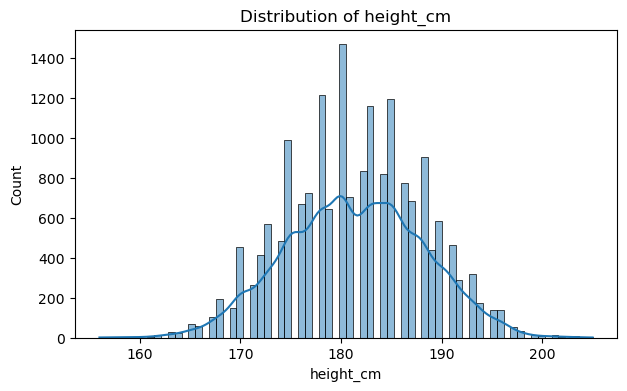

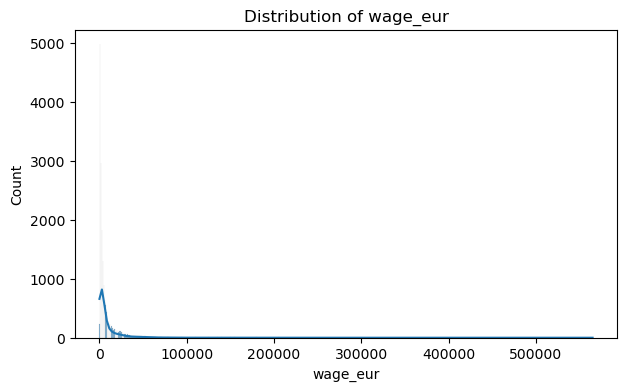

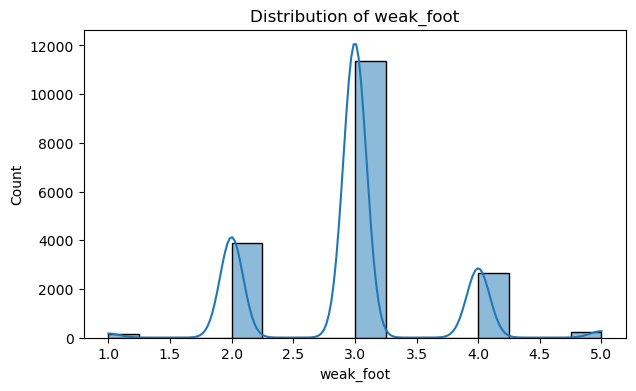

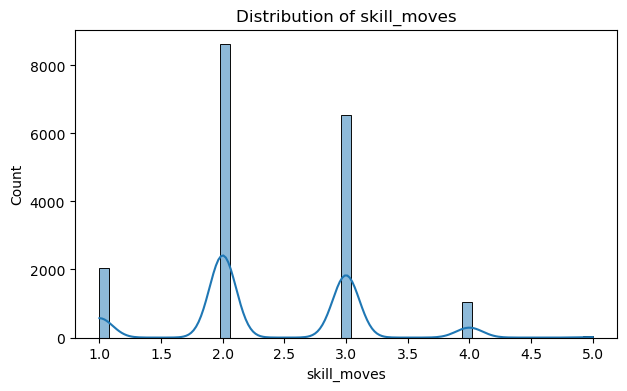

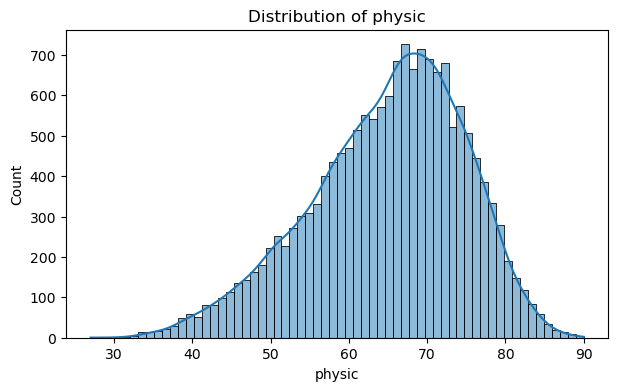

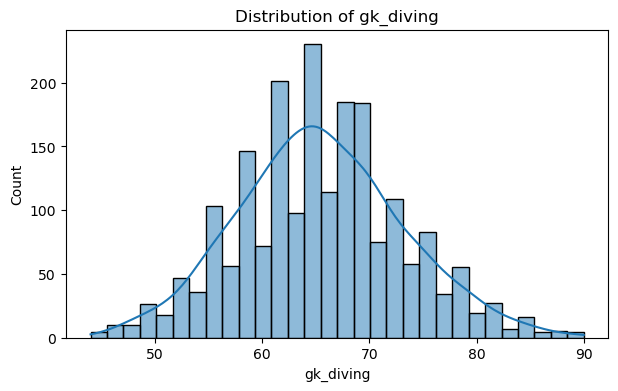

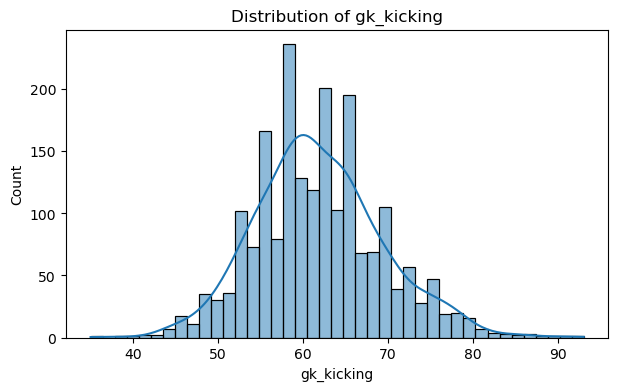

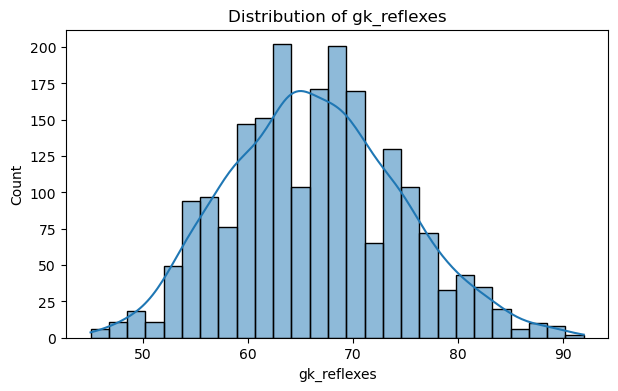

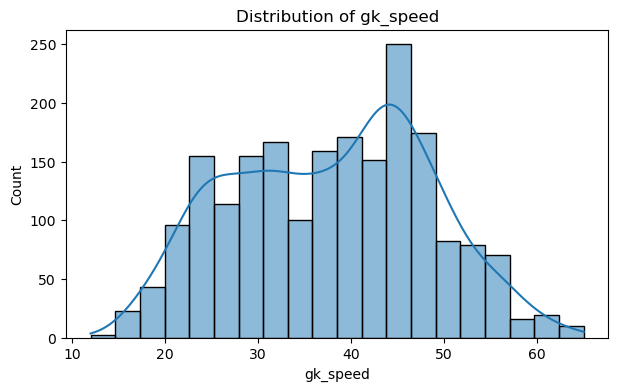

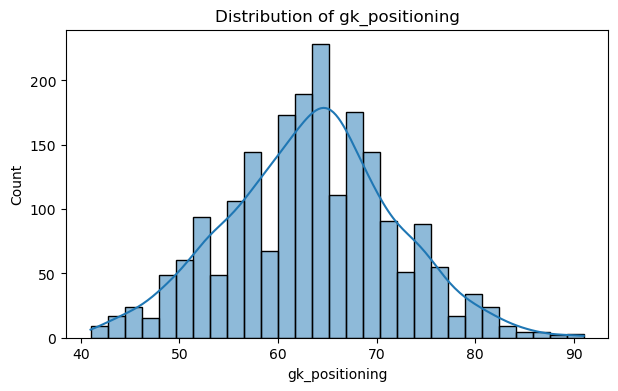

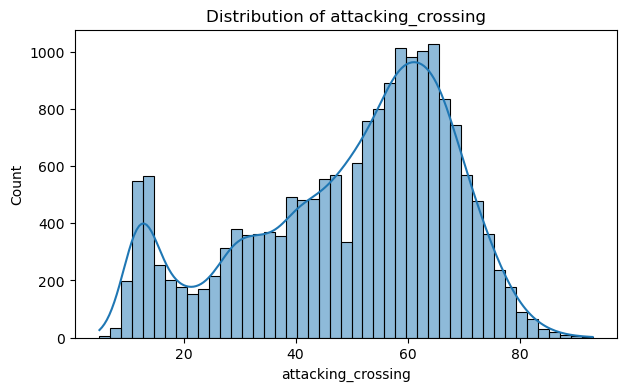

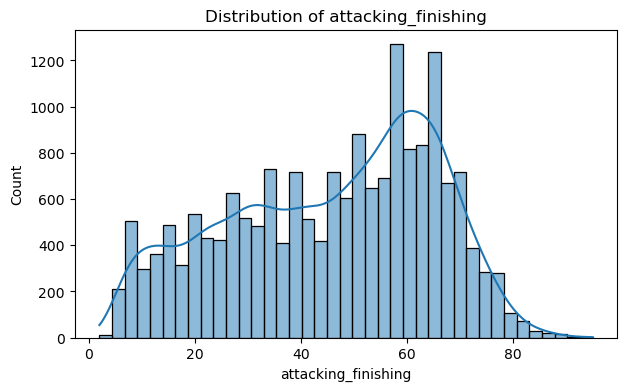

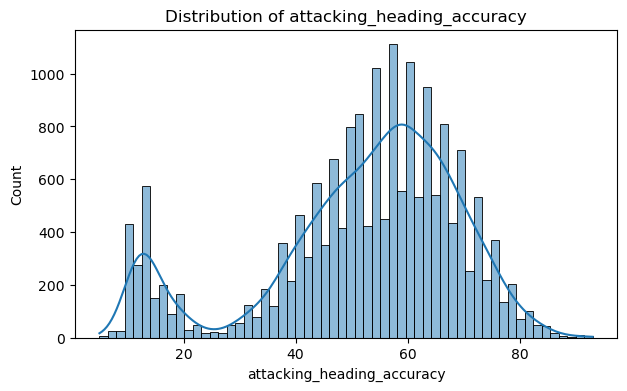

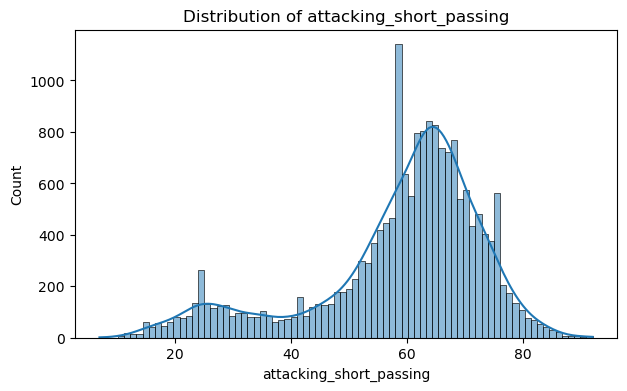

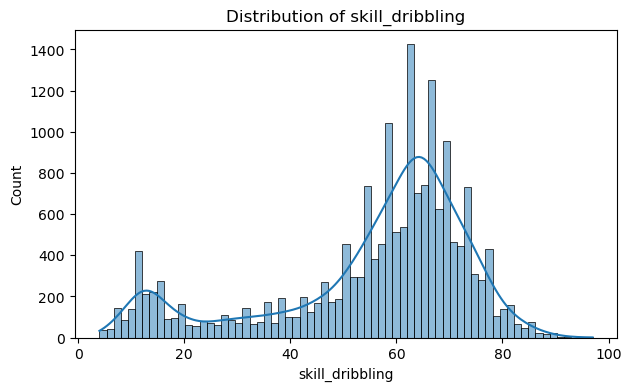

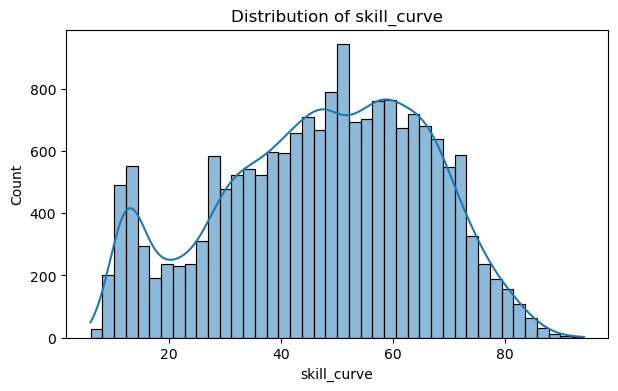

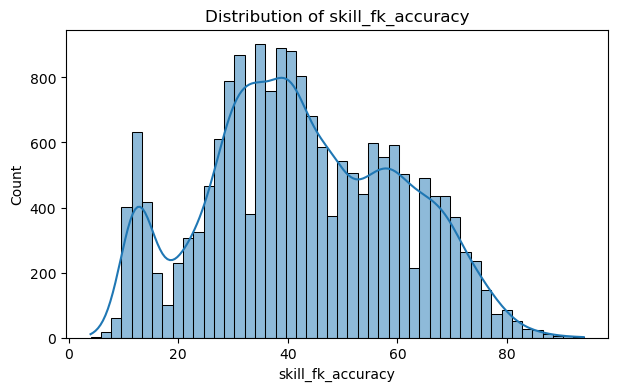

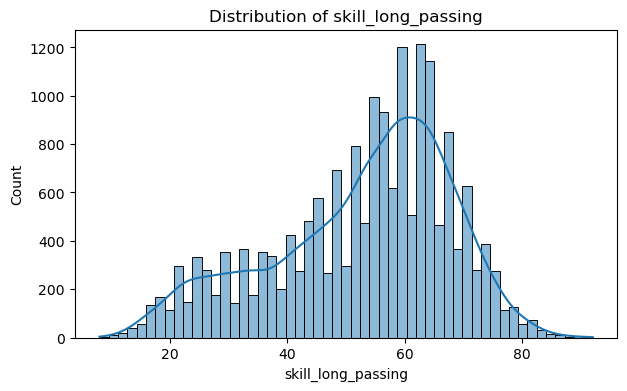

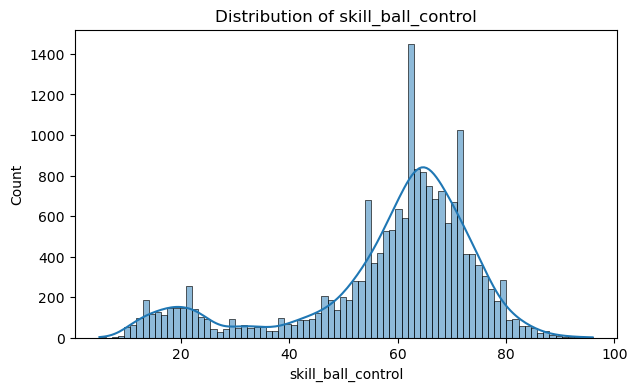

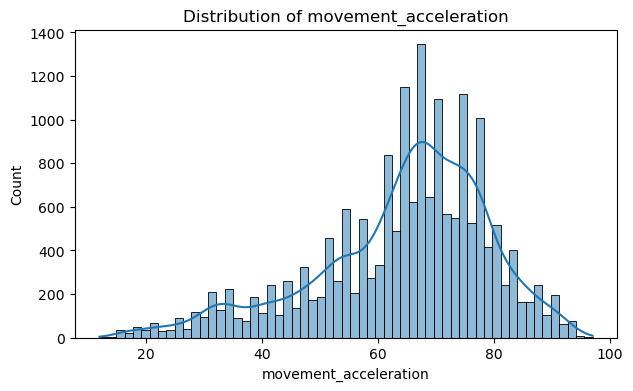

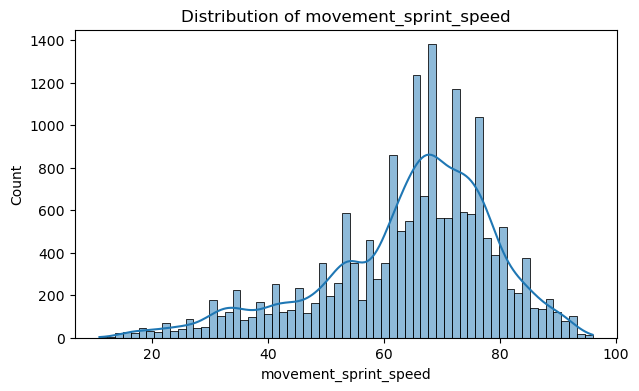

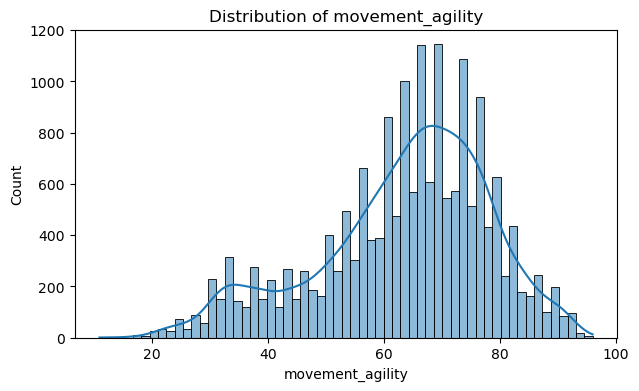

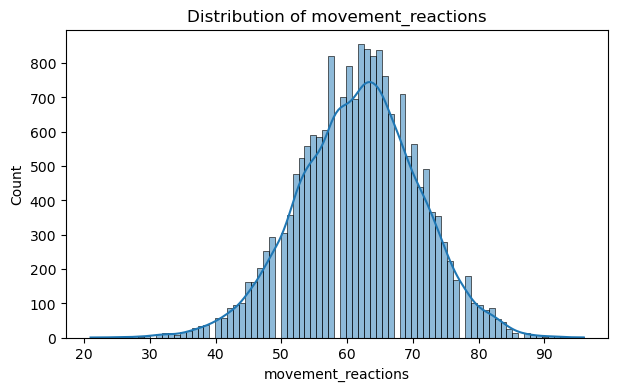

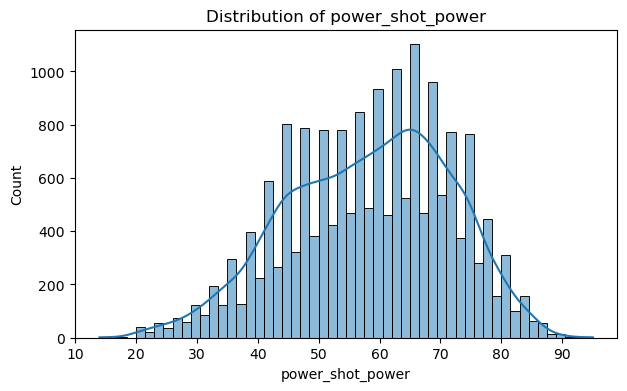

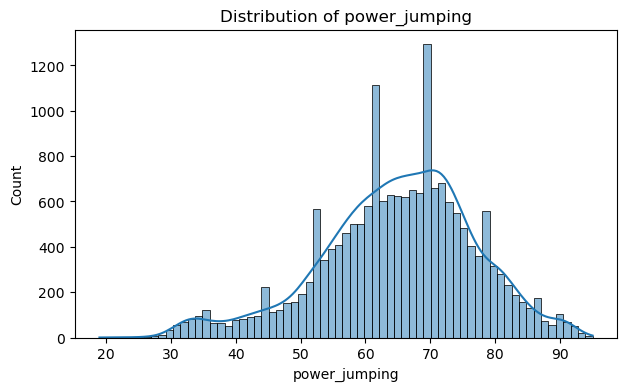

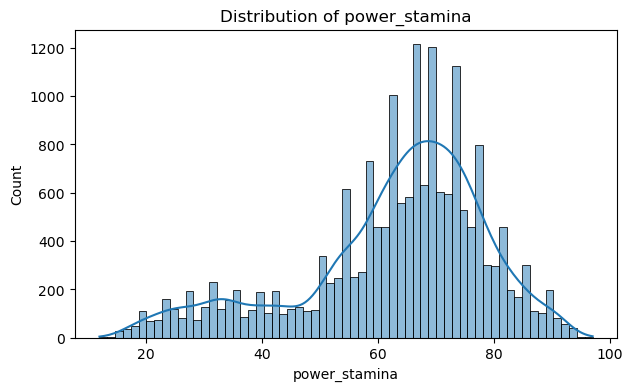

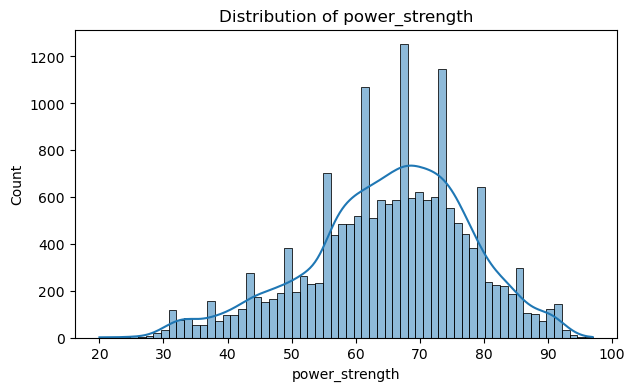

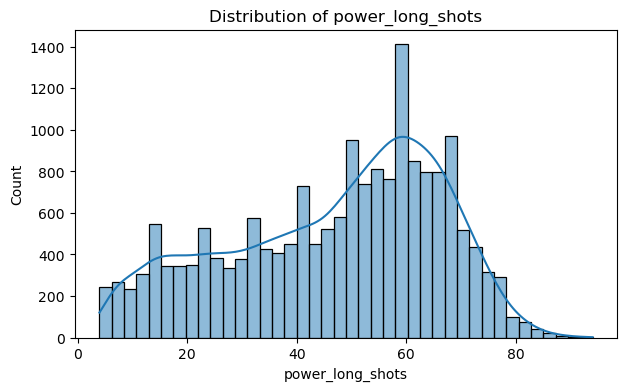

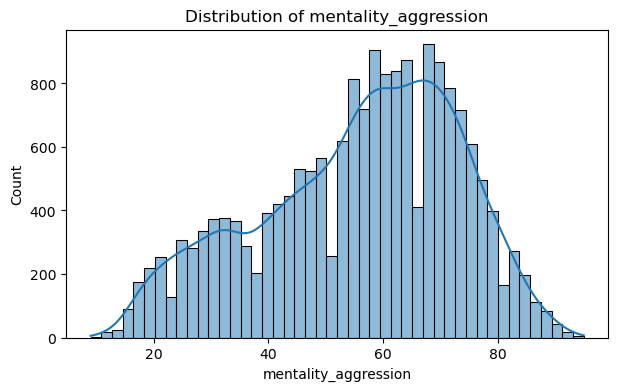

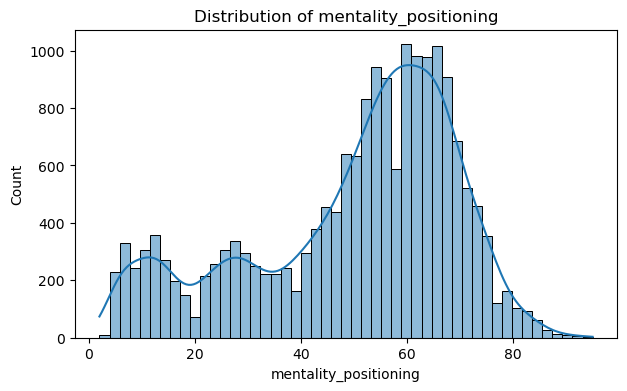

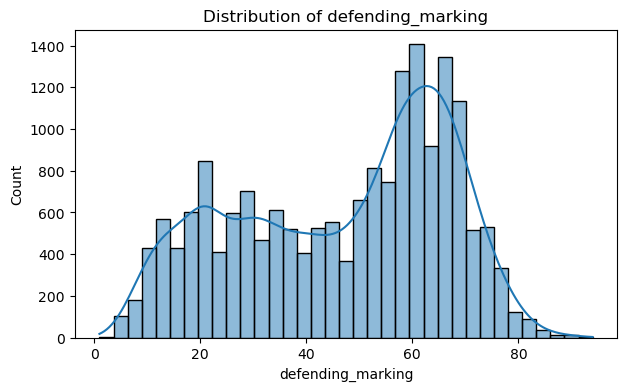

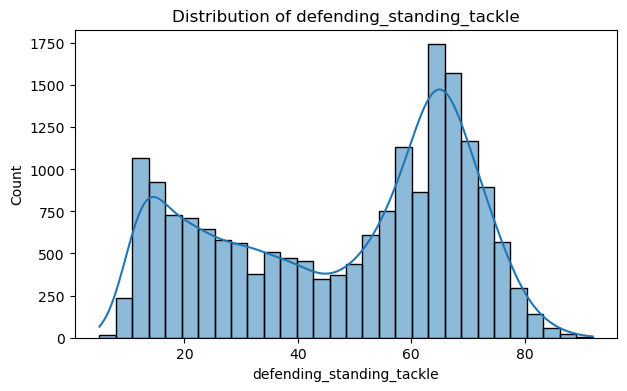

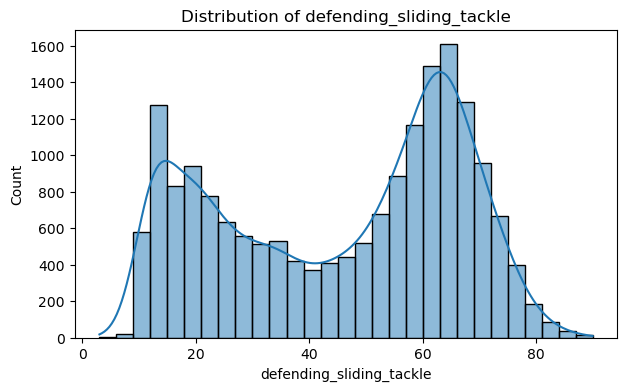

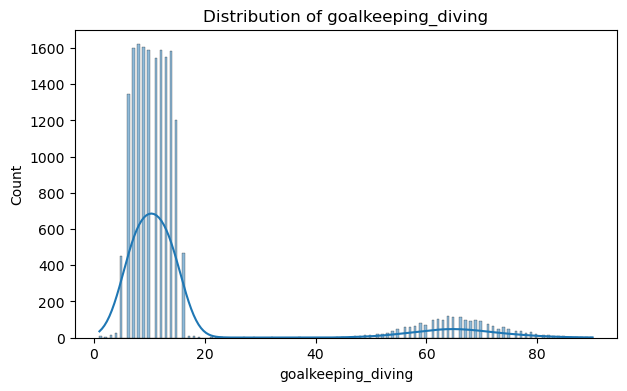

In [22]:
# Histograms for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df_del[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Countplots for categorical columns
for col in cat_cols:
    if df_del[col].nunique() < 30:  # Only for small categories
        plt.figure(figsize=(7,4))
        sns.countplot(data=df_del, x=col)
        plt.title(f"Count Plot - {col}")
        plt.xticks(rotation=45)
        plt.show()

In [23]:
# Skewness
print("\nSkewness:")
skewness = df_del[numeric_cols].skew().sort_values(ascending=False)
print(skewness)


Skewness:
wage_eur                      7.821096
release_clause_eur            6.460916
value_eur                     6.425941
international_reputation      4.296515
goalkeeping_positioning       2.460666
goalkeeping_reflexes          2.455488
goalkeeping_diving            2.442975
goalkeeping_kicking           2.432850
goalkeeping_handling          2.429536
team_jersey_number            2.126464
contract_valid_until          0.505437
age                           0.380620
gk_kicking                    0.334275
gk_handling                   0.277855
potential                     0.249941
weight_kg                     0.220802
gk_reflexes                   0.197779
skill_moves                   0.173640
gk_diving                     0.168173
weak_foot                     0.162986
skill_fk_accuracy             0.094116
overall                       0.070893
nation_jersey_number          0.026385
gk_positioning                0.008147
gk_speed                     -0.024248
height_cm     

In [24]:
# 3. OUTLIER DETECTION USING IQR
def detect_outliers(col):
    Q1 = df_del[col].quantile(0.25)
    Q3 = df_del[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)
    outliers = df_del[(df_del[col] < lower) | (df_del[col] > upper)]
    return outliers

outlier_report = {}

for col in numeric_cols:
    outliers = detect_outliers(col)
    outlier_report[col] = len(outliers)

print("\nOutlier Count per Column:")
print(outlier_report)


Outlier Count per Column:
{'age': 19, 'height_cm': 89, 'weight_kg': 73, 'overall': 151, 'potential': 145, 'value_eur': 2511, 'wage_eur': 2360, 'international_reputation': 1484, 'weak_foot': 6931, 'skill_moves': 49, 'release_clause_eur': 2470, 'team_jersey_number': 711, 'contract_valid_until': 3, 'nation_jersey_number': 0, 'pace': 342, 'shooting': 0, 'passing': 69, 'dribbling': 502, 'defending': 0, 'physic': 148, 'gk_diving': 14, 'gk_handling': 13, 'gk_kicking': 34, 'gk_reflexes': 10, 'gk_speed': 0, 'gk_positioning': 13, 'attacking_crossing': 0, 'attacking_finishing': 0, 'attacking_heading_accuracy': 1068, 'attacking_short_passing': 1734, 'attacking_volleys': 0, 'skill_dribbling': 2035, 'skill_curve': 0, 'skill_fk_accuracy': 1, 'skill_long_passing': 13, 'skill_ball_control': 2051, 'movement_acceleration': 405, 'movement_sprint_speed': 499, 'movement_agility': 209, 'movement_reactions': 161, 'movement_balance': 248, 'power_shot_power': 4, 'power_jumping': 426, 'power_stamina': 923, 'pow

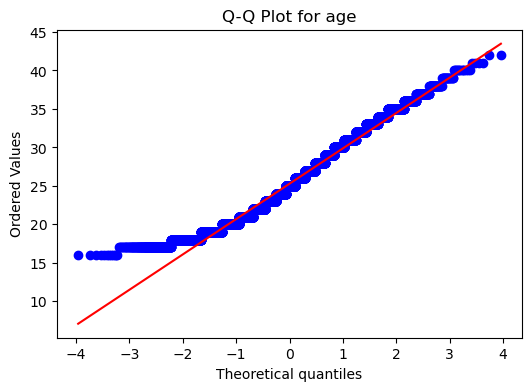

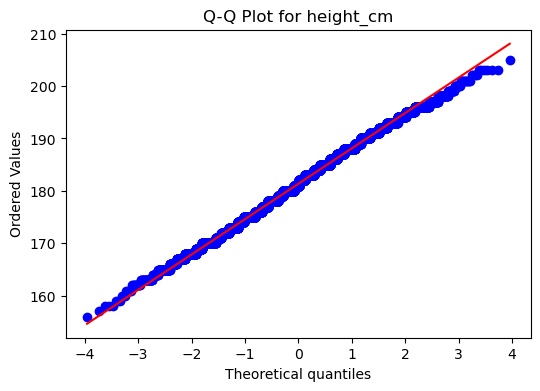

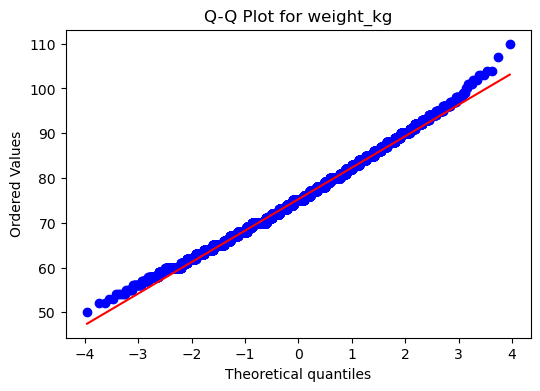

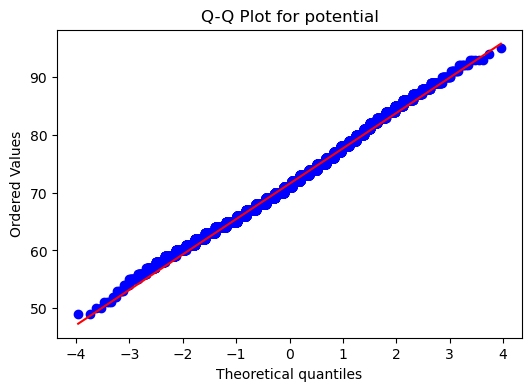

In [25]:
# 4. NORMALITY CHECK (Q-Q PLOT)
for col in numeric_cols[:6]:  # first 6 numeric columns
    plt.figure(figsize=(6,4))
    stats.probplot(df_del[col].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {col}")
    plt.show()


Correlation with Overall (if present):
overall                       1.000000
gk_diving                     0.948912
gk_reflexes                   0.947823
gk_positioning                0.944758
gk_handling                   0.925025
movement_reactions            0.864526
gk_kicking                    0.790903
mentality_composure           0.719992
passing                       0.683954
potential                     0.646650
value_eur                     0.638230
release_clause_eur            0.631286
dribbling                     0.601190
wage_eur                      0.573578
power_shot_power              0.567504
physic                        0.517214
mentality_vision              0.509251
attacking_short_passing       0.503157
shooting                      0.497881
skill_long_passing            0.487289
gk_speed                      0.480652
international_reputation      0.475557
age                           0.464305
skill_ball_control            0.457052
power_long_shots        

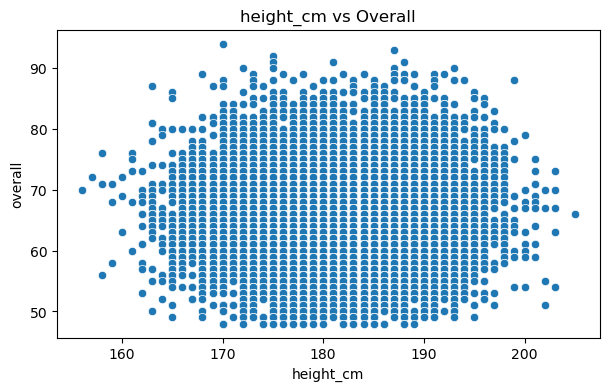

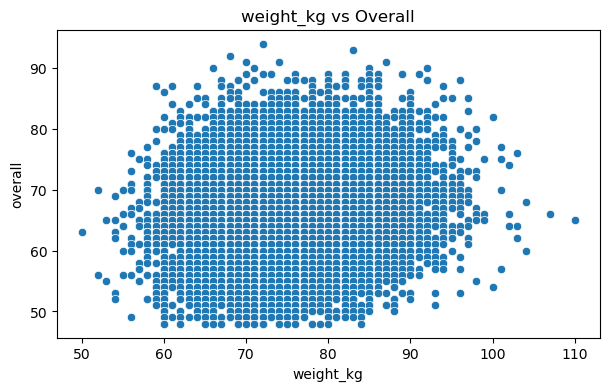

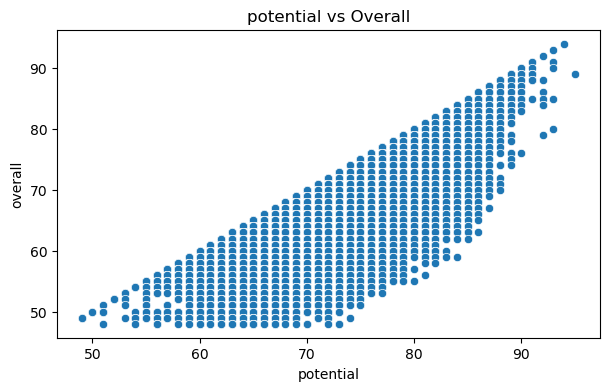

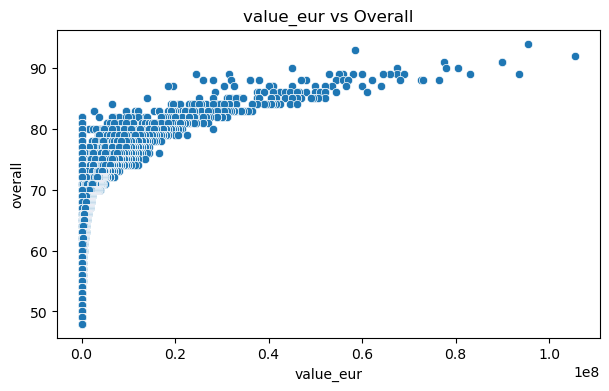

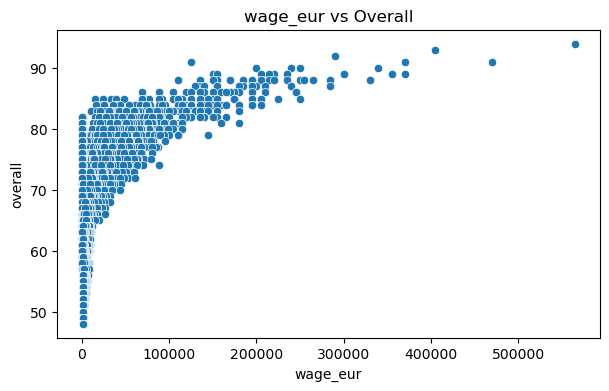

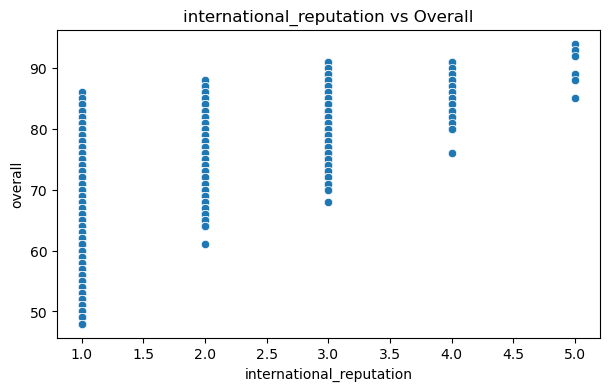

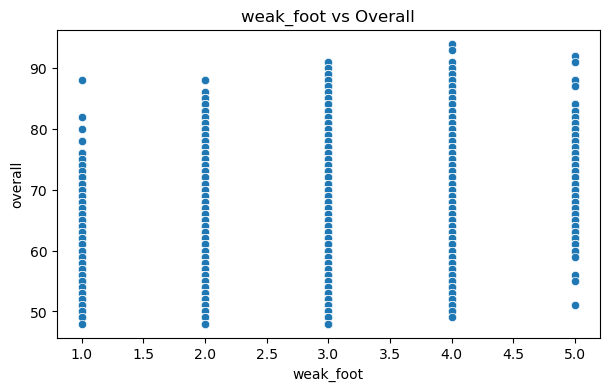

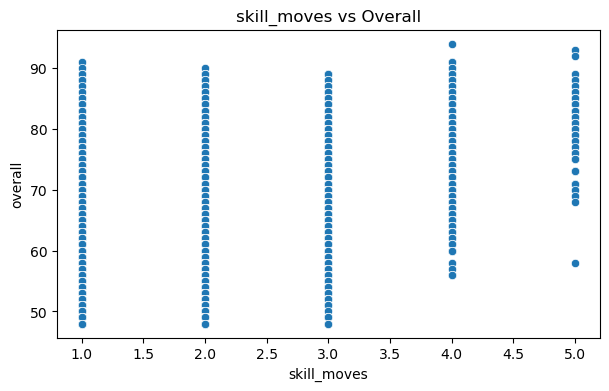

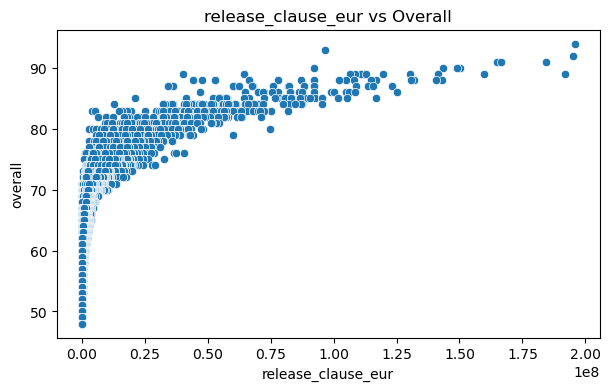

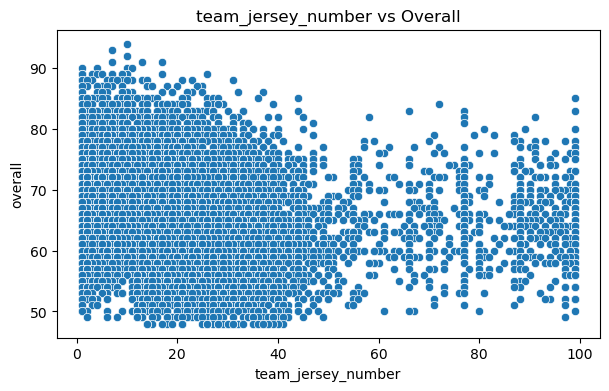

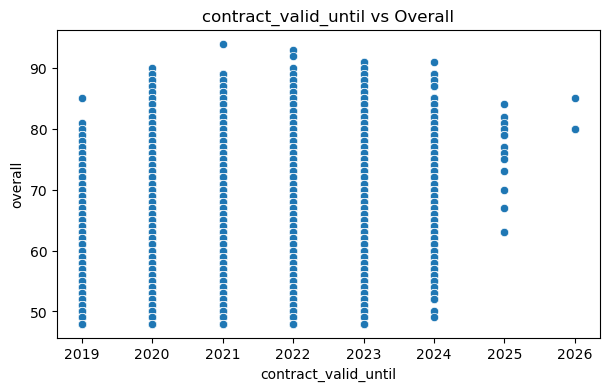

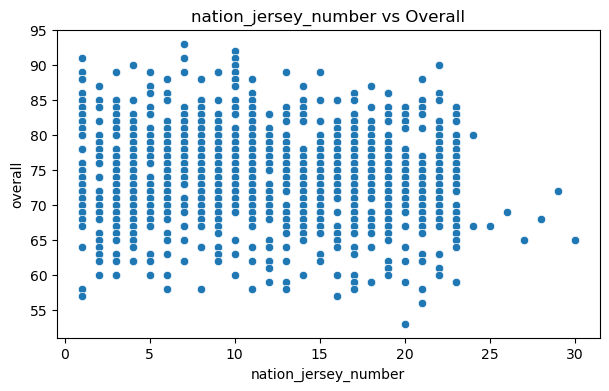

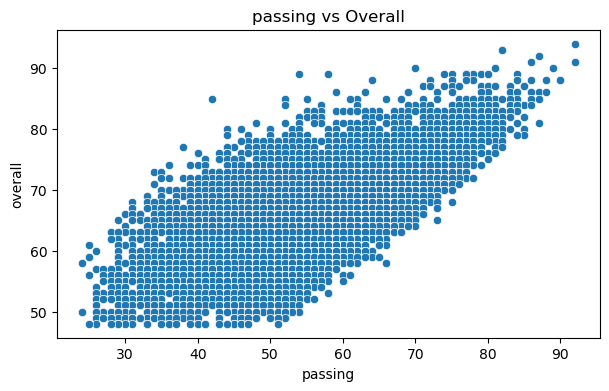

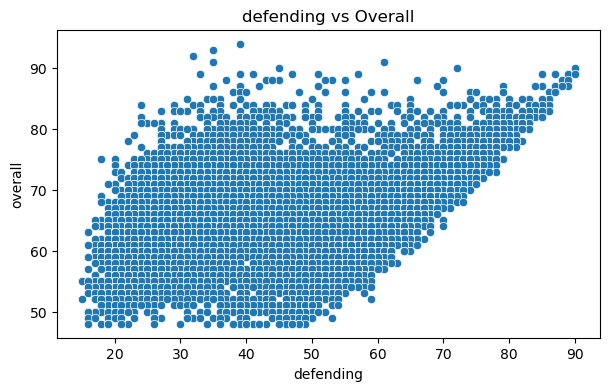

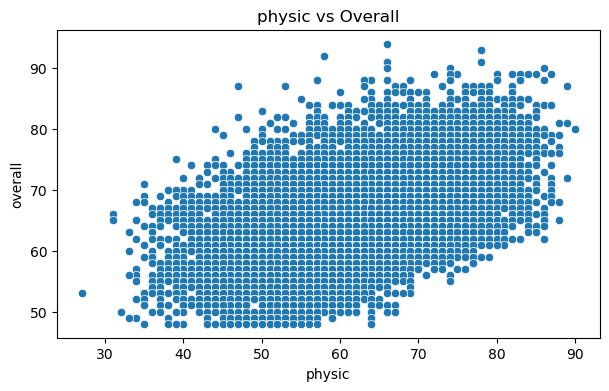

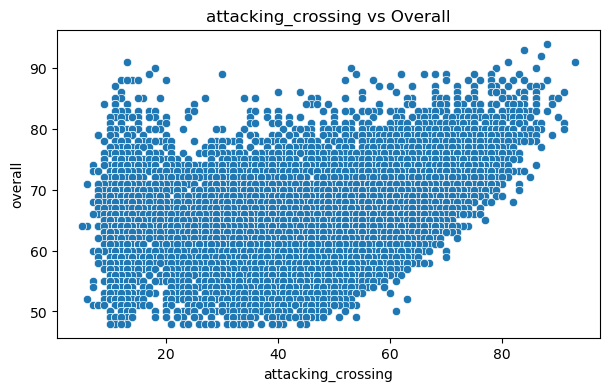

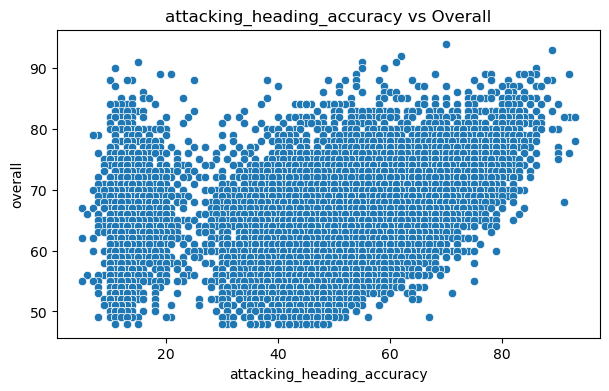

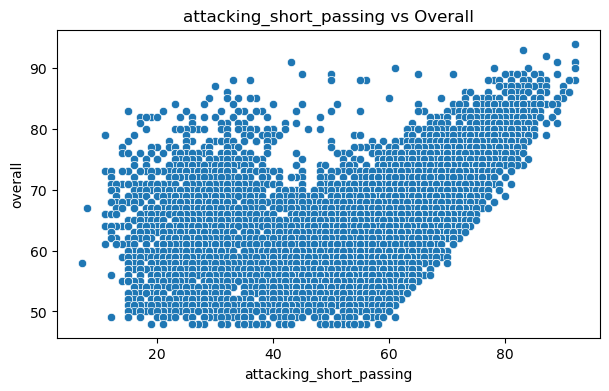

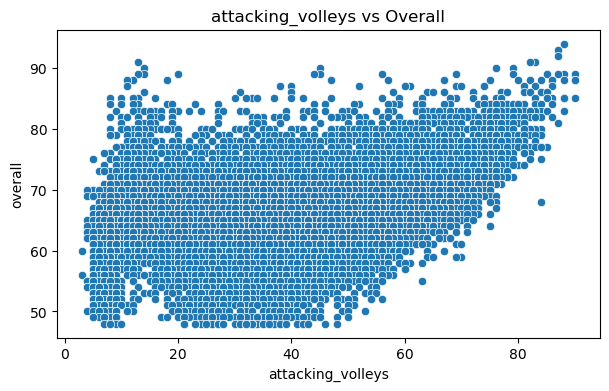

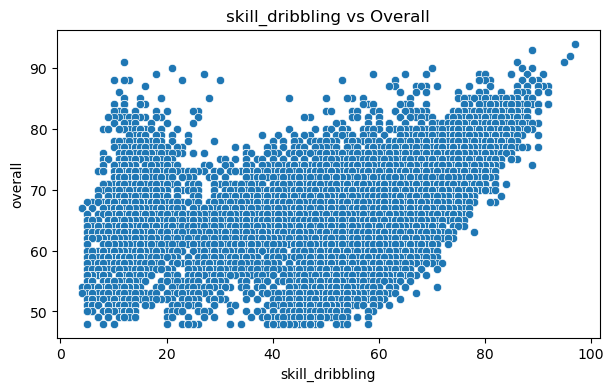

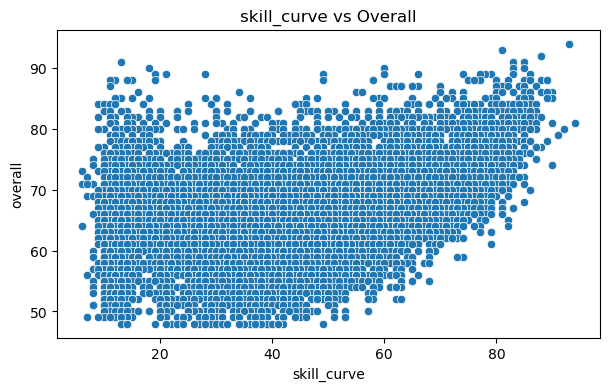

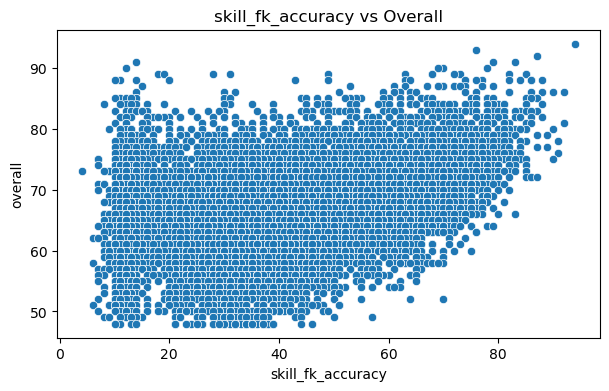

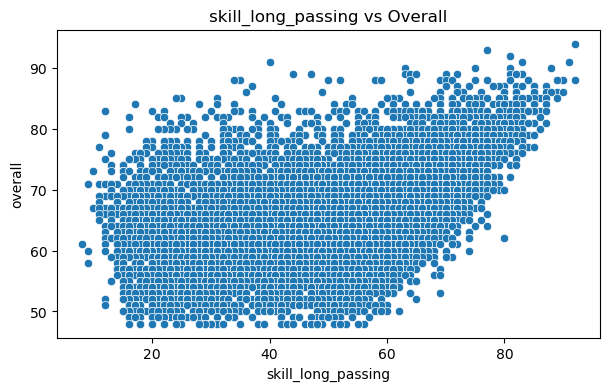

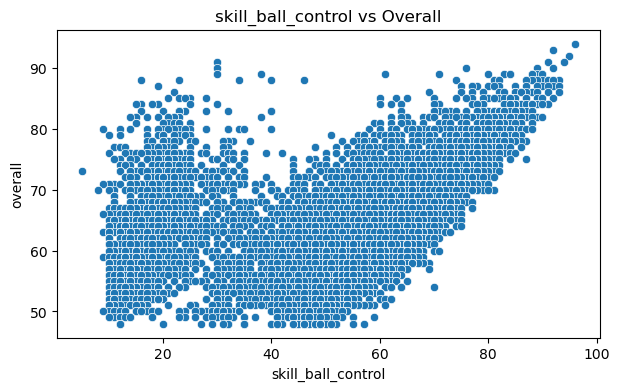

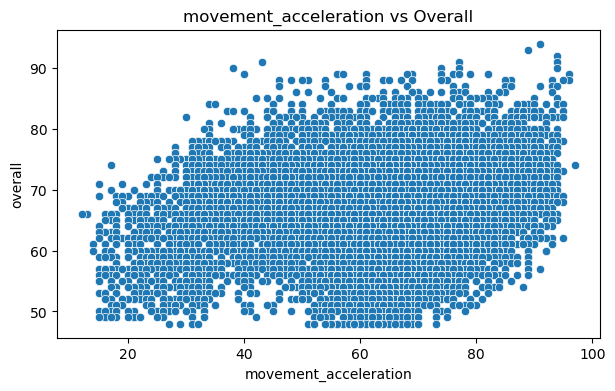

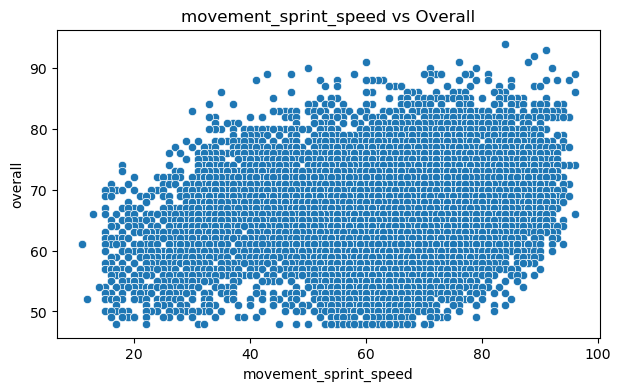

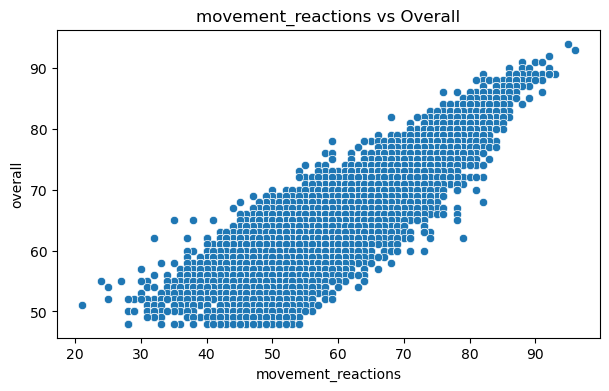

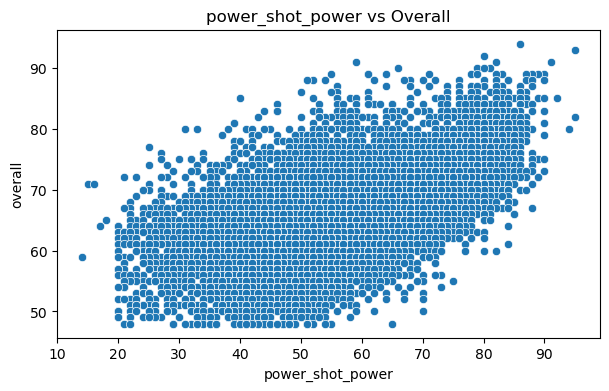

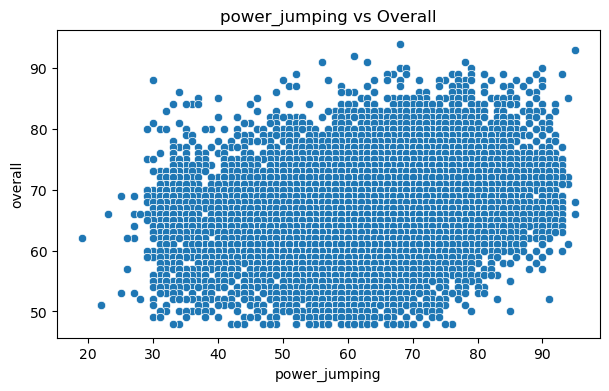

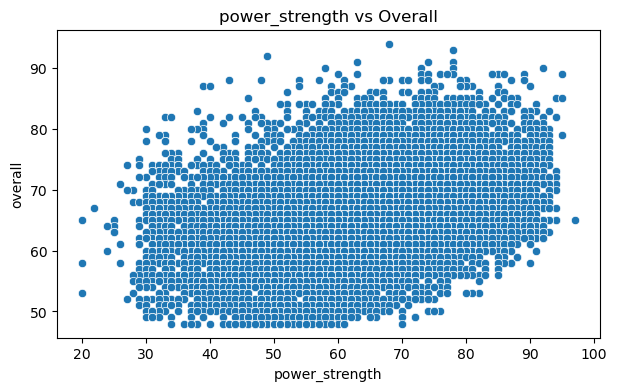

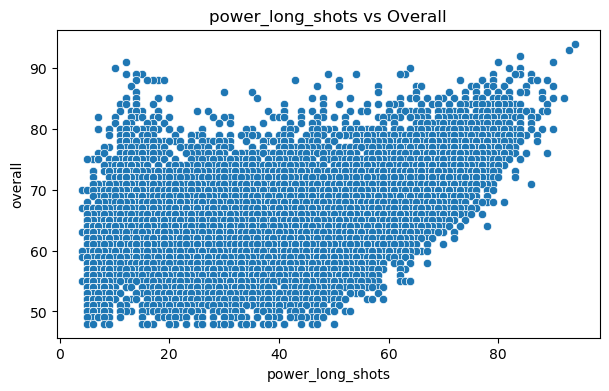

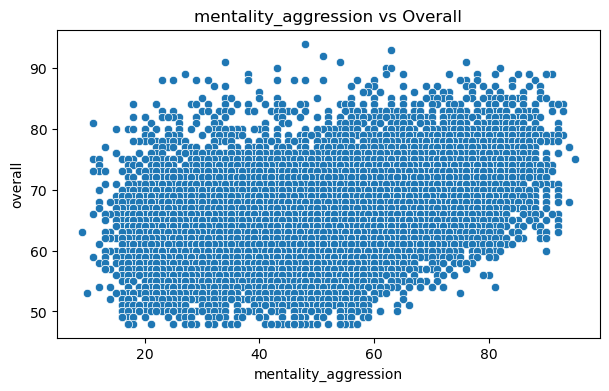

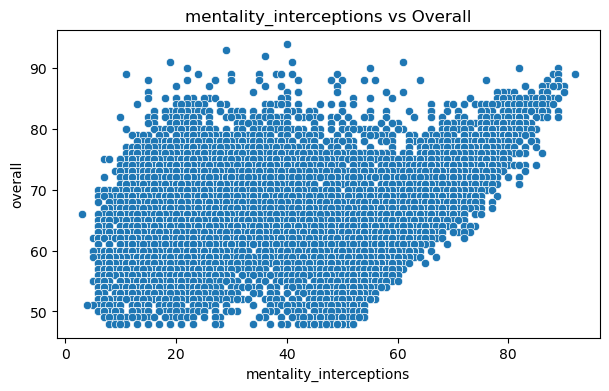

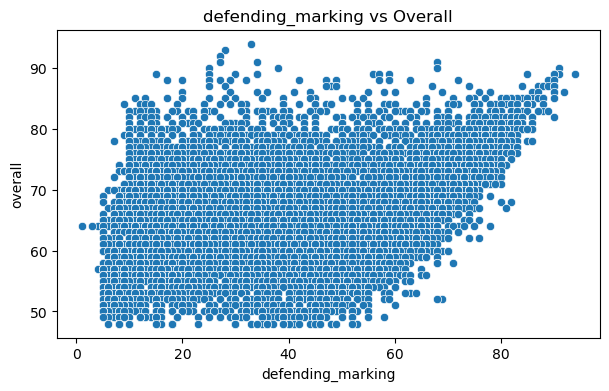

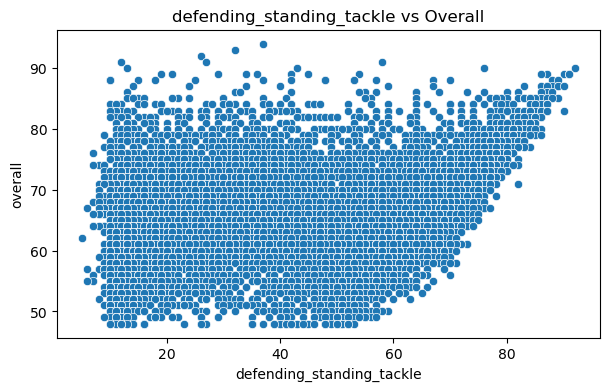

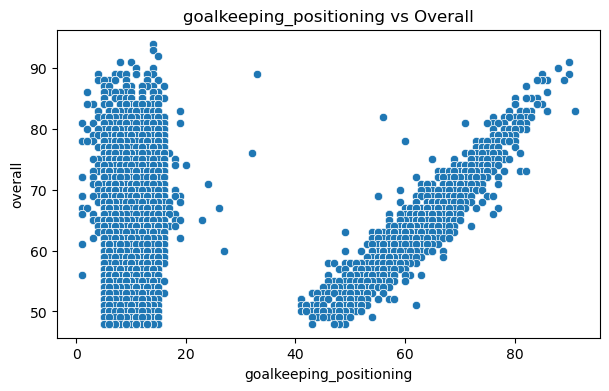

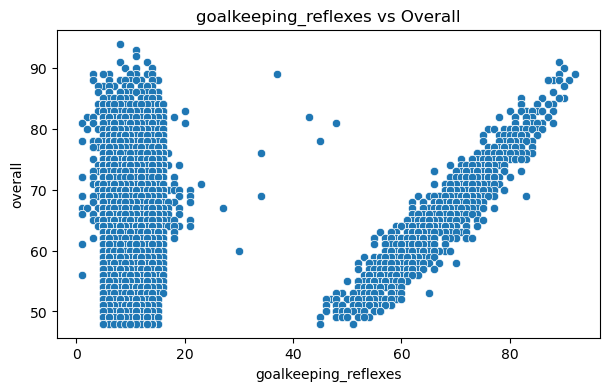

In [26]:
# 5. BIVARIATE ANALYSIS
print("\nCorrelation with Overall (if present):")
if "overall" in df_del.columns:
    print(df_del[numeric_cols].corr()["overall"].sort_values(ascending=False))

# Scatter plot for numerical vs Overall
if "overall" in df_del.columns:
    for col in numeric_cols:
        if col != "overall":
            plt.figure(figsize=(7,4))
            sns.scatterplot(data=df_del, x=col, y="overall")
            plt.title(f"{col} vs Overall")
            plt.show()

# Boxplots for categorical vs numeric
for col in cat_cols:
    if df_del[col].nunique() < 12:  # Avoid crowded boxplots
        plt.figure(figsize=(10,4))
        sns.boxplot(data=df_del, x=col, y=df_del[numeric_cols[0]])
        plt.title(f"{numeric_cols[0]} vs {col}")
        plt.xticks(rotation=45)
        plt.show()

In [27]:
# 6. MULTIVARIATE ANALYSIS (PAIR PLOT)
sns.pairplot(df_del[numeric_cols[:5]])  # first 5 numeric columns
plt.show()


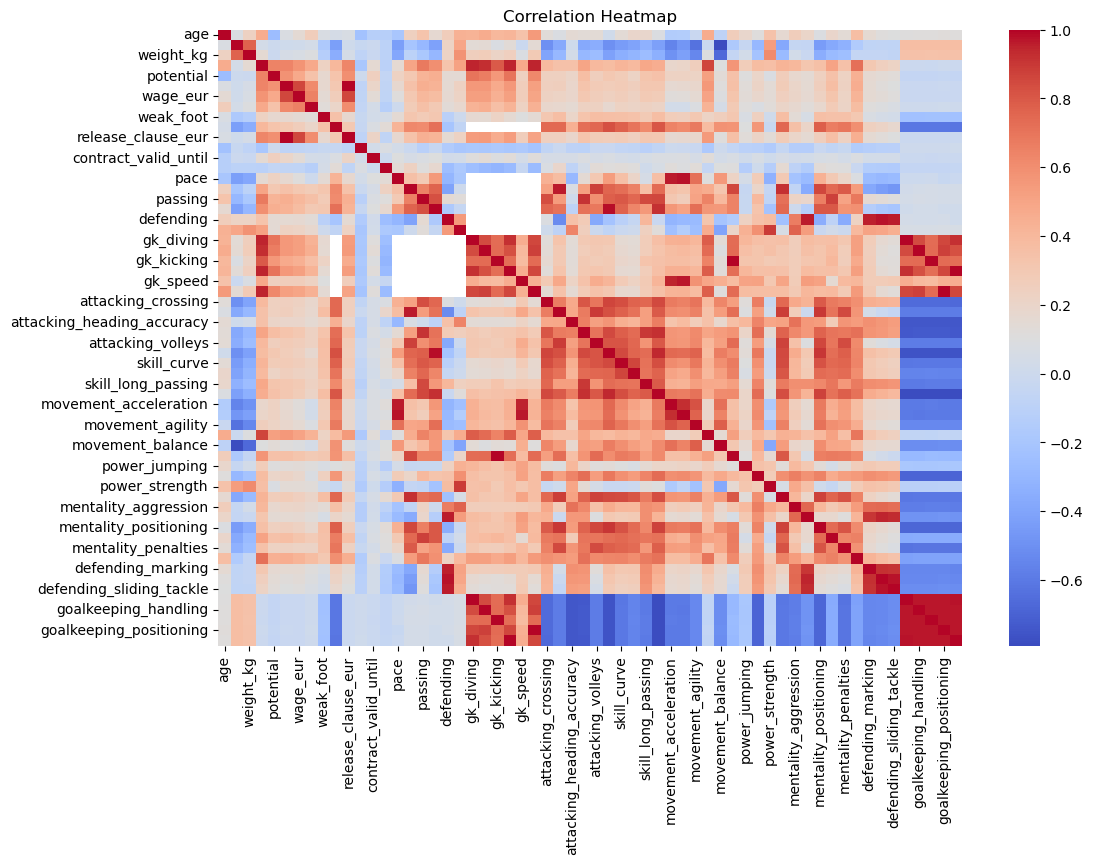


Highly Correlated Feature Pairs (> 0.85):
('overall', 'gk_diving')
('overall', 'gk_handling')
('overall', 'gk_reflexes')
('overall', 'gk_positioning')
('overall', 'movement_reactions')
('value_eur', 'wage_eur')
('value_eur', 'release_clause_eur')
('wage_eur', 'value_eur')
('wage_eur', 'release_clause_eur')
('release_clause_eur', 'value_eur')
('release_clause_eur', 'wage_eur')
('pace', 'movement_acceleration')
('pace', 'movement_sprint_speed')
('shooting', 'attacking_finishing')
('shooting', 'attacking_volleys')
('shooting', 'power_shot_power')
('shooting', 'power_long_shots')
('shooting', 'mentality_positioning')
('passing', 'attacking_short_passing')
('passing', 'skill_ball_control')
('passing', 'mentality_vision')
('dribbling', 'skill_dribbling')
('dribbling', 'skill_ball_control')
('defending', 'mentality_interceptions')
('defending', 'defending_marking')
('defending', 'defending_standing_tackle')
('defending', 'defending_sliding_tackle')
('physic', 'power_strength')
('gk_diving', 

In [28]:
# 7. CORRELATION MATRIX (REDUNDANCY)
plt.figure(figsize=(12,8))
sns.heatmap(df_del[numeric_cols].corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

# Identify highly correlated pairs (>0.85)
corr_matrix = df_del[numeric_cols].corr().abs()
high_corr = np.where(corr_matrix > 0.85)
high_corr_vars = [(numeric_cols[i], numeric_cols[j]) for i, j in zip(*high_corr) if i != j]

print("\nHighly Correlated Feature Pairs (> 0.85):")
for pair in high_corr_vars:
    print(pair)

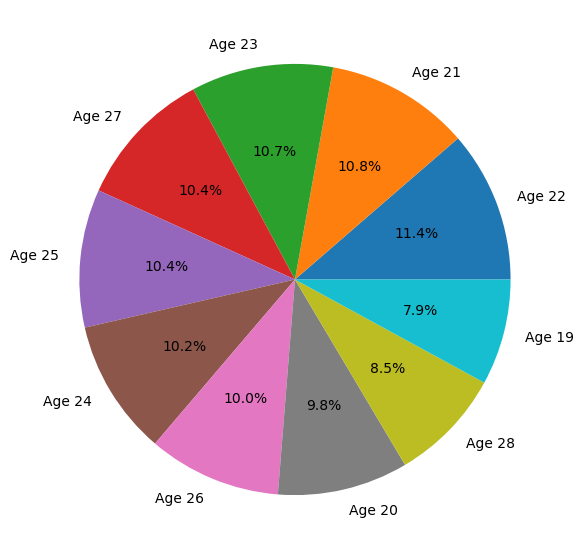

In [29]:
# Age wise distribution of players
fifa_data_age_group = df_del.groupby(df_del["age"]).size().reset_index(name='player_count')
fifa_data_age_group_sorted = fifa_data_age_group.sort_values(by="player_count", ascending=False)

fifa_data_rep_label = []
for age in fifa_data_age_group_sorted.head(10).index:
    fifa_data_rep_label.append("Age " + str(fifa_data_age_group_sorted.loc[age, 'age']))

plt.figure(figsize=(7,7))
plt.pie(fifa_data_age_group_sorted["player_count"].head(10), labels = fifa_data_rep_label, autopct="%.1f%%")
plt.show()

In [30]:
df_del

short_name  age  height_cm  weight_kg  overall  potential  \
0               L. Messi   32        170         72       94         94   
1      Cristiano Ronaldo   34        187         83       93         93   
2              Neymar Jr   27        175         68       92         92   
3               J. Oblak   26        188         87       91         93   
4              E. Hazard   28        175         74       91         91   
...                  ...  ...        ...        ...      ...        ...   
18273         Shao Shuai   22        186         79       48         56   
18274       Xiao Mingjie   22        177         66       48         56   
18275          Zhang Wei   19        186         75       48         56   
18276       Wang Haijian   18        185         74       48         54   
18277         Pan Ximing   26        182         78       48         51   

       value_eur  wage_eur  international_reputation  weak_foot  ...  \
0       95500000    565000                         5          4  ...   
1       58500000    405000                         5          4  ...   
2      105500000    290000                         5          5  ...   
3       77500000    125000                         3          3  ...   
4       90000000    470000                         4          4  ...   
...          ...       ...                       ...        ...  ...   
18273      40000      2000                         1          3  ...   
18274      40000      2000                         1          2  ...   
18275      40000      1000                         1          2  ...   
18276      40000      1000                         1          2  ...   
18277      40000      2000                         1          3  ...   

       mentality_penalties  mentality_composure  defending_marking  \
0                       75                   96                 33   
1                       85                   95                 28   
2                       90                   94                 27   
3                       11                   68                 27   
4                       88                   91                 34   
...                    ...                  ...                ...   
18273                   39                   41                 45   
18274                   37                   35                 42   
18275                   36                   39                 46   
18276                   36                   40                 39   
18277                   38                   42                 52   

       defending_standing_tackle  defending_sliding_tackle  \
0                             37                        26   
1                             32                        24   
2                             26                        29   
3                             12                        18   
4                             27                        22   
...                          ...                       ...   
18273                         50                        52   
18274                         53                        57   
18275                         52                        46   
18276                         44                        54   
18277                         42                        48   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
0                       6                    11                   15   
1                       7                    11                   15   
2                       9                     9                   15   
3                      87                    92                   78   
4                      11                    12                    6   
...                   ...                   ...                  ...   
18273                   5                     5                   13   
18274                  13                     6                   14   
18275         

*    A rank ordered list of top 10 countries with most players.
*   Which  countries are producing the most footballers that play at this     level.



# The rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level

In [33]:
# Data of different countries
df['nationality']

0        Argentina
1         Portugal
2           Brazil
3         Slovenia
4          Belgium
           ...    
18273     China PR
18274     China PR
18275     China PR
18276     China PR
18277     China PR
Name: nationality, Length: 18278, dtype: object

In [34]:
df['nationality'].nunique()

162

In [35]:
top_nation = df['nationality'].value_counts()
top_nation

nationality
England                1667
Germany                1216
Spain                  1035
France                  984
Argentina               886
                       ... 
Liberia                   1
São Tomé & Príncipe       1
Puerto Rico               1
Bahrain                   1
Indonesia                 1
Name: count, Length: 162, dtype: int64

In [36]:
# Top 10 Countries
top_nation_df = top_nation.reset_index()
top_nation_df.columns = ['Country', 'Number_of_Players']
print(top_nation_df.head(10))

       Country  Number_of_Players
0      England               1667
1      Germany               1216
2        Spain               1035
3       France                984
4    Argentina                886
5       Brazil                824
6        Italy                732
7     Colombia                591
8        Japan                453
9  Netherlands                416


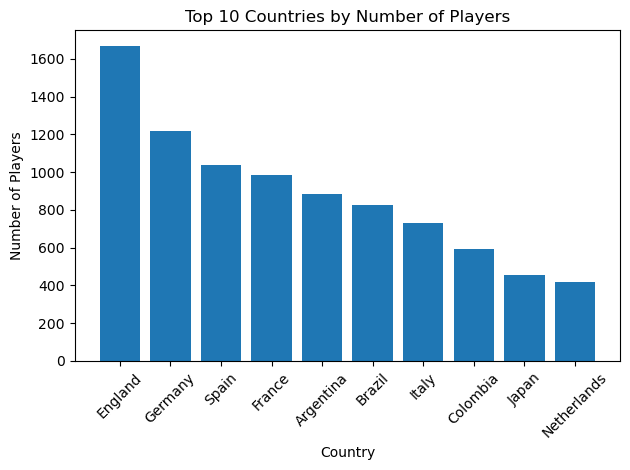

In [37]:

top_10 = top_nation_df.head(10)


plt.bar(top_10['Country'], top_10['Number_of_Players'])
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.title('Top 10 Countries by Number of Players')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* England leads by a large margin, reflecting its extensive professional league system.

* Germany and Spain follow, supported by well-structured youth academies and strong domestic leagues.

* France stands out due to its elite youth development system, producing technically strong and physically gifted players.

* Argentina and Brazil dominate among South American nations, highlighting their football-centric culture and consistent export of talent to European leagues.

* Italy and the Netherlands continue to contribute significantly through tactical training and technical development.

* Colombia and Japan indicate growing football ecosystems outside traditional European powerhouses, with increasing global representation.


# The distribution of overall rating vs. age of players.what is the age after which a player stops improving

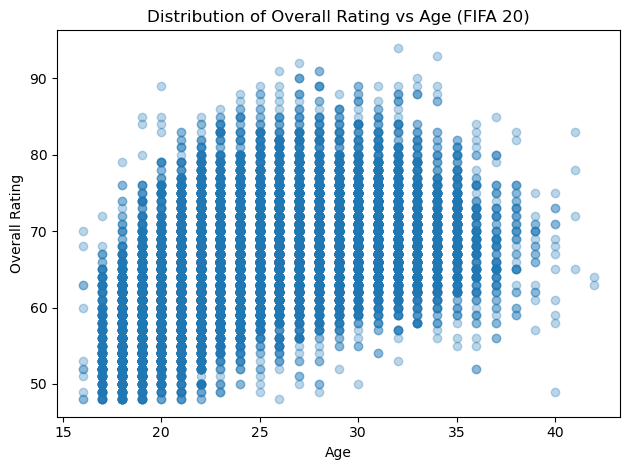

In [40]:
# Keep only required columns and drop missing values
df_age_overall = df[['age', 'overall']].dropna()

# Scatter plot: Overall vs Age
plt.figure()
plt.scatter(df_age_overall['age'], df_age_overall['overall'], alpha=0.3)
plt.xlabel("Age")
plt.ylabel("Overall Rating")
plt.title("Distribution of Overall Rating vs Age (FIFA 20)")
plt.tight_layout()
plt.show()

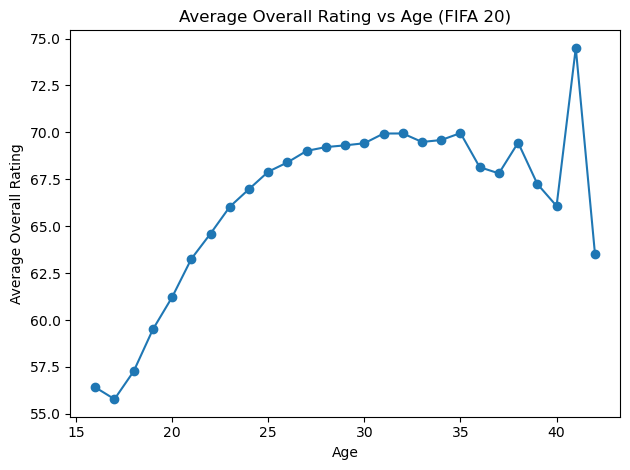

In [41]:
age_avg = df_age_overall.groupby('age')['overall'].mean().reset_index()

# Line plot
plt.figure()
plt.plot(age_avg['age'], age_avg['overall'], marker='o')
plt.xlabel("Age")
plt.ylabel("Average Overall Rating")
plt.title("Average Overall Rating vs Age (FIFA 20)")
plt.tight_layout()
plt.show()

Players generally improve steadily from their teenage years up to around 26–28 years of age.
After ~28 years, the average overall rating plateaus and then gradually declines, indicating that players stop improving and may experience performance decline due to physical factors.

* Peak performance age: 26–28 years

* Improvement slows after: ~27 years

* Decline begins after: ~29–30 years

The type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger.

In [44]:
#  required columns
dt = df[['player_positions', 'wage_eur']].dropna()

# Helper function to check if a position is present
def has_position(pos_string, position):
    return position in pos_string.split(",")

# Filter players by position
strikers = dt[dt['player_positions'].apply(lambda x: has_position(x, 'ST'))]
right_wingers = dt[dt['player_positions'].apply(lambda x: has_position(x, 'RW'))]
left_wingers = dt[dt['player_positions'].apply(lambda x: has_position(x, 'LW'))]

# Calculate average wages
avg_wages = pd.DataFrame({
    'Position': ['Striker (ST)', 'Right Winger (RW)', 'Left Winger (LW)'],
    'Average_Wage_EUR': [
        strikers['wage_eur'].median(),
        right_wingers['wage_eur'].median(),
        left_wingers['wage_eur'].median()
    ]
})

print(avg_wages)

            Position  Average_Wage_EUR
0       Striker (ST)            4000.0
1  Right Winger (RW)            3000.0
2   Left Winger (LW)            3000.0


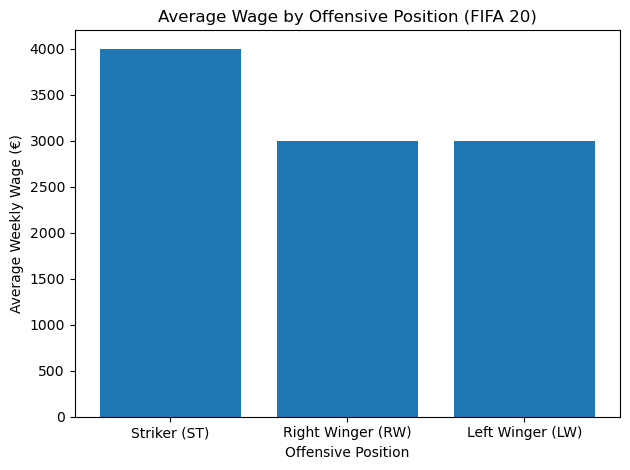

In [45]:
plt.figure()
plt.bar(avg_wages['Position'], avg_wages['Average_Wage_EUR'])
plt.xlabel("Offensive Position")
plt.ylabel("Average Weekly Wage (€)")
plt.title("Average Wage by Offensive Position (FIFA 20)")
plt.tight_layout()
plt.show()

* Strikers are primary goal-scorers → highest market value and wage demand.

* Wingers contribute through assists, pace, and creativity but are slightly less valued than pure goal scorers.

* Wage difference reflects scarcity of elite strikers and their direct impact on match outcomes.

Strikers are primary goal-scorers → highest market value and wage demand.

Wingers contribute through assists, pace, and creativity but are slightly less valued than pure goal scorers.

Wage difference reflects scarcity of elite strikers and their direct impact on match outcomes.

## Choose the “top n%”
## Example: top 5%

* Goal of the point

You must analyze the top n% players (example: top 5%) and check:

Which attributes are more common among the top players
(e.g., Agility, BallControl, Strength, etc.)

Compare these trends across FIFA versions (e.g., FIFA 15 → FIFA 20).
- This shows how player attributes have evolved in the game.

*  If you have only FIFA 20 (players_20.csv)

You can still do:

Select top 5% players by Overall.

Check which attributes are significantly higher.

Understand which skills the game values most.

In [49]:
top_percent = 0.05
cutoff = df_del['overall'].quantile(1 - top_percent)

top_players = df_del[df_del['overall'] >= cutoff]
top_players.shape


(992, 61)

## Choose technical + physical attributes:

In [51]:

# Identify top 5% players
cutoff = df_del['overall'].quantile(0.95)
top_players = df_del[df_del['overall'] >= cutoff]

# Correct attribute names for FIFA 20
attributes = [
    'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
    'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_balance', 'skill_ball_control',
    'power_strength', 'power_stamina'
]

# Calculate averages
top_attr = top_players[attributes].mean()
all_attr = df_del[attributes].mean()

# Compare
comparison = pd.DataFrame({
    'Top 5% Players': top_attr,
    'All Players': all_attr
})
comparison['Difference'] = comparison['Top 5% Players'] - comparison['All Players']
comparison.sort_values('Difference', ascending=False)


Top 5% Players  All Players  Difference
passing                     71.930995    57.233777   14.697219
shooting                    66.683258    52.298301   14.384957
skill_ball_control          72.277218    58.461976   13.815242
dribbling                   75.590498    62.531585   13.058913
defending                   62.455882    51.553503   10.902379
power_stamina               71.287298    62.889485    8.397814
physic                      72.735294    64.876678    7.858616
power_strength              71.536290    65.234763    6.301527
movement_agility            69.332661    63.504924    5.827737
movement_sprint_speed       69.322581    64.415746    4.906835
movement_acceleration       68.952621    64.299923    4.652698
pace                        71.763575    67.700899    4.062676
movement_balance            66.844758    63.856439    2.988319

## Compare top 5% with overall dataset

In [53]:
comparison = pd.DataFrame({
    'Top 5% Average': top_attr,
    'All Players Average': all_attr
})
comparison['Difference'] = comparison['Top 5% Average'] - comparison['All Players Average']
comparison.sort_values('Difference', ascending=False)


Top 5% Average  All Players Average  Difference
passing                     71.930995            57.233777   14.697219
shooting                    66.683258            52.298301   14.384957
skill_ball_control          72.277218            58.461976   13.815242
dribbling                   75.590498            62.531585   13.058913
defending                   62.455882            51.553503   10.902379
power_stamina               71.287298            62.889485    8.397814
physic                      72.735294            64.876678    7.858616
power_strength              71.536290            65.234763    6.301527
movement_agility            69.332661            63.504924    5.827737
movement_sprint_speed       69.322581            64.415746    4.906835
movement_acceleration       68.952621            64.299923    4.652698
pace                        71.763575            67.700899    4.062676
movement_balance            66.844758            63.856439    2.988319

##Report:

which attributes are most important for top players
(e.g., high Agility, BallControl, Acceleration)

which attributes are not very important

**Some Analysis :**

* Historical comparison between Messi and Ronaldo (what skill attributes changed the most during time - compared to real-life stats);

* Ideal budget to create a competitive team (at the level of top n teams in Europe) and at which point the budget does not allow to buy significantly
  better players for the 11-men lineup. An extra is the same comparison with the Potential attribute for the lineup instead of the Overall attribute;

* Sample analysis of top n% players (e.g. top 5% of the player) to see if some important attributes such as Agility or BallControl or Strength have
  been popular or not across the FIFA versions. An example would be seeing thatthe top 5% players of FIFA 20 are faster (higher Acceleration and Agility)
  compared to FIFA 15. The trend of attributes is also an important indication of how some attributes are necessary for players to win games (a version
  with more top 5% players with high BallControl stats would indicate that the game is more focused on the technique rather than the physical aspect).

 **Final Output the analysis report:**

“We analyzed the top 5% of players in each FIFA version, examining which attributes appear most consistently among elite players. The results show that
attributes such as Agility, BallControl, and Acceleration have become increasingly important in recent FIFA versions. For instance, top-tier players in
FIFA 20 demonstrate significantly higher dribbling attributes compared to earlier versions, indicating the game’s evolution toward more technical and
agile gameplay.”

In [57]:
df_del = df_del[df_del.overall > 86] # extracting players with overall above 86
df_del

short_name  age  height_cm  weight_kg  overall  potential  \
0            L. Messi   32        170         72       94         94   
1   Cristiano Ronaldo   34        187         83       93         93   
2           Neymar Jr   27        175         68       92         92   
3            J. Oblak   26        188         87       91         93   
4           E. Hazard   28        175         74       91         91   
5        K. De Bruyne   28        181         70       91         91   
6       M. ter Stegen   27        187         85       90         93   
7         V. van Dijk   27        193         92       90         91   
8           L. Modrić   33        172         66       90         90   
9            M. Salah   27        175         71       90         90   
10          K. Mbappé   20        178         73       89         95   
11       K. Koulibaly   28        187         89       89         91   
12            H. Kane   25        188         89       89         91   
13            Alisson   26        191         91       89         91   
14             De Gea   28        192         82       89         90   
15           N. Kanté   28        168         72       89         90   
16       G. Chiellini   34        187         85       89         89   
17          S. Agüero   31        173         70       89         89   
18       Sergio Ramos   33        184         82       89         89   
19          L. Suárez   32        182         86       89         89   
20     R. Lewandowski   30        184         80       89         89   
21    Sergio Busquets   30        189         76       89         89   
22       A. Griezmann   28        176         73       89         89   
23          P. Dybala   25        177         75       88         92   
24           P. Pogba   26        191         84       88         91   
25            Ederson   25        188         86       88         91   
26        R. Sterling   24        170         69       88         90   
27         C. Eriksen   27        181         76       88         89   
28        T. Courtois   27        199         96       88         89   
29              Piqué   32        194         85       88         88   
30      S. Handanovič   34        193         92       88         88   
31           M. Neuer   33        193         92       88         88   
32          H. Lloris   32        188         82       88         88   
33        David Silva   33        173         67       88         88   
34          E. Cavani   32        185         77       88         88   
35           D. Godín   33        187         78       88         88   
36           T. Kroos   29        183         76       88         88   
37            M. Reus   30        180         71       88         88   
38      P. Aubameyang   30        187         80       88         88   
39            S. Mané   27        175         69       88         88   
40         A. Laporte   25        189         85       87         90   
41     Bernardo Silva   24        173         64       87         90   
42           Casemiro   27        185         84       87         89   
43             H. Son   26        183         78       87         88   
44        Fernandinho   34        179         67       87         87   
45       Thiago Silva   34        183         82       87         87   
46         K. Benzema   31        185         81       87         87   
47      J. Vertonghen   32        189         86       87         87   
48         D. Mertens   32        169         61       87         87   
49         M. Hummels   30        191         94       87         87   
50    T. Alderweireld   30        186         81       87         87   
51         Jordi Alba   30        170         68       87         87   
52             Thiago   28        174         70       87         87   
53           K. Navas   32        185         80       87         87   
54         L. Insigne   28        163         59   

In [58]:
stats = [] # Adjusted to be empty as the columns it refers to are not present in df_del.
for col in stats:
    new = df_del[col].str.split("+", n = 1, expand = True)
    df_del[col] = new[0]
# Replace NaN with 0
df_del[stats] = df_del[stats].fillna(0)
df_del[stats] = df_del[stats].astype(int)
df_del[stats].head(6)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5]

In [59]:
pd.set_option('display.max_rows', 70)
df_del.isnull().sum()

short_name                     0
age                            0
height_cm                      0
weight_kg                      0
overall                        0
potential                      0
value_eur                      0
wage_eur                       0
international_reputation       0
weak_foot                      0
skill_moves                    0
release_clause_eur             0
team_jersey_number             0
contract_valid_until           0
nation_jersey_number          21
pace                          10
shooting                      10
passing                       10
dribbling                     10
defending                     10
physic                        10
gk_diving                     45
gk_handling                   45
gk_kicking                    45
gk_reflexes                   45
gk_speed                      45
gk_positioning                45
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_

## Handeling null values

In [61]:
names = df_del.short_name.tolist() # saving names for later

df_del = df_del.drop(['short_name'], axis = 1) # drop the short_name column

In [62]:
df_del = df_del.fillna(df_del.median())

In [63]:
df_del.isnull().sum()

age                           0
height_cm                     0
weight_kg                     0
overall                       0
potential                     0
value_eur                     0
wage_eur                      0
international_reputation      0
weak_foot                     0
skill_moves                   0
release_clause_eur            0
team_jersey_number            0
contract_valid_until          0
nation_jersey_number          0
pace                          0
shooting                      0
passing                       0
dribbling                     0
defending                     0
physic                        0
gk_diving                     0
gk_handling                   0
gk_kicking                    0
gk_reflexes                   0
gk_speed                      0
gk_positioning                0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attacking_volleys             0
skill_dr

## Preprocessing

In [65]:
# Data Preprocessing
x = df_del.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

## Transformation PCA reduce 60 columns into 2

In [67]:
# Principal Component Analysts
pca = PCA(n_components = 2) # 2D PCA for the plot
reduced = pd.DataFrame(pca.fit_transform(X_norm))

In [68]:
# specify the number of clusters
kmeans = KMeans(n_clusters=5)

# fit the input data
kmeans = kmeans.fit(reduced)

# get the cluster labels
labels = kmeans.predict(reduced)

# centroid values
centroid = kmeans.cluster_centers_

# cluster values
clusters = kmeans.labels_.tolist()

C:\Users\Mishra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [69]:
reduced['cluster'] = clusters
reduced['name'] = names
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head()

x         y  cluster               name
0  1.444174 -1.319785        0           L. Messi
1  1.145137 -0.920204        0  Cristiano Ronaldo
2  1.297305 -1.483436        0          Neymar Jr
3 -3.007595 -0.765065        1           J. Oblak
4  1.171571 -1.270520        0          E. Hazard

In [70]:
sns.set(style="white")

# lmplot returns a FacetGrid, not an Axes object
grid = sns.lmplot(
    x="x", y="y", hue='cluster', data=reduced, legend=False,
    fit_reg=False, height=10, aspect=1, scatter_kws={"s":250}
)

# Add labels for each point
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    plt.text(x, y, s, fontsize=10)

# Adjust grid axis limits
grid.set(ylim=(-2, 2))

plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize=20)
plt.ylabel("PC 2", fontsize=20)

plt.show()


In [71]:
df_del

age  height_cm  weight_kg  overall  potential  value_eur  wage_eur  \
0    32        170         72       94         94   95500000    565000   
1    34        187         83       93         93   58500000    405000   
2    27        175         68       92         92  105500000    290000   
3    26        188         87       91         93   77500000    125000   
4    28        175         74       91         91   90000000    470000   
5    28        181         70       91         91   90000000    370000   
6    27        187         85       90         93   67500000    250000   
7    27        193         92       90         91   78000000    200000   
8    33        172         66       90         90   45000000    340000   
9    27        175         71       90         90   80500000    240000   
10   20        178         73       89         95   93500000    155000   
11   28        187         89       89         91   67500000    150000   
12   25        188         89       89         91   83000000    220000   
13   26        191         91       89         91   58000000    155000   
14   28        192         82       89         90   56000000    205000   
15   28        168         72       89         90   66000000    235000   
16   34        187         85       89         89   24500000    215000   
17   31        173         70       89         89   60000000    300000   
18   33        184         82       89         89   31500000    300000   
19   32        182         86       89         89   53000000    355000   
20   30        184         80       89         89   64500000    235000   
21   30        189         76       89         89   55000000    300000   
22   28        176         73       89         89   69000000    370000   
23   25        177         75       88         92   76500000    215000   
24   26        191         84       88         91   72500000    250000   
25   25        188         86       88         91   54500000    185000   
26   24        170         69       88         90   73000000    255000   
27   27        181         76       88         89   68000000    205000   
28   27        199         96       88         89   48000000    235000   
29   32        194         85       88         88   38000000    285000   
30   34        193         92       88         88   26000000    110000   
31   33        193         92       88         88   32000000    155000   
32   32        188         82       88         88   36000000    150000   
33   33        173         67       88         88   36000000    265000   
34   32        185         77       88         88   47000000    195000   
35   33        187         78       88         88   28000000    135000   
36   29        183         76       88         88   57000000    330000   
37   30        180         71       88         88   56000000    170000   
38   30        187         80       88         88   57000000    205000   
39   27        175         69       88         88   62000000    220000   
40   25        189         85       87         90   56500000    195000   
41   24        173         64       87         90   64000000    210000   
42   27        185         84       87         89   53500000    240000   
43   26        183         78       87         88   60000000    185000   
44   34        179         67       87         87   19500000    200000   
45   34        183         82       87         87   18500000    135000   
46   31        185         81       87         87   45000000    285000   
47   32        189         86       87         87   32500000    155000   
48   32        169         61       87         87   40000000    135000   
49   30        191         94       87         87   41000000    130000   
50   30        186         81       87         87   41000000    155000   
51   30        170         68       87         87   40000000    240000   
52   28        174         70       87         87   50000000    180000   
53   32 

## DBSCAN

In [73]:
# Applying DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5) # You can adjust eps and min_samples as needed
db_clusters = dbscan.fit_predict(reduced[['x', 'y']])

reduced['cluster'] = db_clusters
reduced['name'] = names
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head()

x         y  cluster               name
0  1.444174 -1.319785        0           L. Messi
1  1.145137 -0.920204        0  Cristiano Ronaldo
2  1.297305 -1.483436        0          Neymar Jr
3 -3.007595 -0.765065        1           J. Oblak
4  1.171571 -1.270520        0          E. Hazard

In [74]:
sns.set(style="white")

ax = sns.lmplot(
    x="x", y="y", hue='cluster', data=reduced, legend=False,
    fit_reg=False, height=10, aspect=1, scatter_kws={"s":250}
)

texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    texts.append(plt.text(x, y, s))

# Adjust grid axis limits
ax.set(ylim=(-2, 2))

plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize=20)
plt.ylabel("PC 2", fontsize=20)

plt.show()

# Finding Optimal Epsilon

In [76]:
# calculate the distance from each point to its closest neighbor
nn = NearestNeighbors(n_neighbors = 2)

# fit the nearest neighbor using only numerical columns
nbrs = nn.fit(reduced[['x', 'y']])

# returns two arrays - distance to the closest n_neighbors points and index for each point
distances, indices = nbrs.kneighbors(reduced[['x', 'y']])

# sort the distance and plot it
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

# DB Scan with new Epsilon

In [78]:
# train the model using DBSCAN
db= DBSCAN(eps=0.3, min_samples=5)

# prediction for dbscan clusters
db_clusters = db.fit_predict(reduced[['x', 'y']])

reduced['cluster'] = db_clusters
reduced['name'] = names
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head()

x         y  cluster               name
0  1.444174 -1.319785       -1           L. Messi
1  1.145137 -0.920204        0  Cristiano Ronaldo
2  1.297305 -1.483436       -1          Neymar Jr
3 -3.007595 -0.765065        1           J. Oblak
4  1.171571 -1.270520        0          E. Hazard

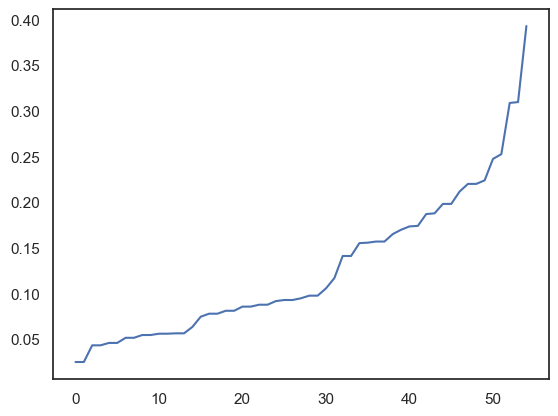

In [79]:
sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced, legend=False,
                   fit_reg=False, height = 9, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=10)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

# Hierarchial Clusturing

#Hierarchical Clustering with Average Linkage

In [82]:
# plot dendrogram using average linkage
plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Average Linkage')

dendrogram = sch.dendrogram(sch.linkage(X_norm, method="average"), labels= names, leaf_font_size = 13, orientation='right')


# Hierarchical Clustering with Single Linkage

In [84]:
# plot dendrogram using single linkage
plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Single Linkage')

dendrogram = sch.dendrogram(sch.linkage(X_norm, method="single"), labels= names, leaf_font_size = 13, orientation='right')

# Hierarchical Clustering with Centroid Linkage

In [86]:
# plot dendrogram using centroid linkage
plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Centroid Linkage')

dendrogram = sch.dendrogram(sch.linkage(X_norm, method="centroid"), labels= names, leaf_font_size = 13, orientation='right')


# Hierarchical Clustering with Complete Linkage

In [88]:
# plot dendrogram using complete linkage
plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Complete Linkage')

dendrogram = sch.dendrogram(sch.linkage(X_norm, method="complete"), labels= names, leaf_font_size = 13, orientation='right')
